<a href="https://colab.research.google.com/github/CaptaiN785/DL-Notebooks/blob/main/rock_paper_scissor/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rock Paper Scissior classification using CNN


In [1]:
## Firstly download the train and validation data

!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip

!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip


--2022-07-03 17:26:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.188.48, 172.217.15.80, 172.217.1.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.188.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   124MB/s    in 1.5s    

2022-07-03 17:26:40 (124 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2022-07-03 17:26:40--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.217.1.208, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip’



In [3]:
import zipfile as p

file = p.ZipFile('rps-test-set.zip', 'r')
file.extractall('data/')
file.close()

In [4]:
file = p.ZipFile('rps.zip', 'r')
file.extractall('train-data/')
file.close()

In [8]:
import os

training_dir = os.path.join('train-data', 'rps')
print("Training dir : ", os.listdir(training_dir))

testing_dir = os.path.join('data', 'rps-test-set')
print("Testing dir : ", os.listdir(testing_dir))

Training dir :  ['rock', 'scissors', 'paper']
Testing dir :  ['rock', 'scissors', 'paper']


In [38]:
## Training directory 

paper_train = os.path.join(training_dir, 'paper')

rock_train = os.path.join(training_dir, 'rock')

scissor_train = os.path.join(training_dir, 'scissors')

## Total size of trainnig data

print("size of training data is ", len(os.listdir(paper_train)) + len(os.listdir(rock_train)) + len(os.listdir(scissor_train)))


size of training data is  2520


In [39]:
## Testing directory

paper_test = os.path.join(testing_dir, 'paper')

rock_test = os.path.join(testing_dir, 'rock')

scissor_test = os.path.join(testing_dir, 'scissors')

print("Size of testing data is ", len(os.listdir(paper_test)) + len(os.listdir(rock_test)) +len(os.listdir(scissor_test)))


Size of testing data is  372


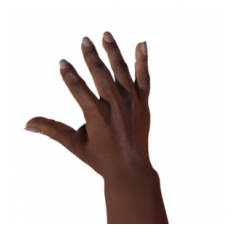

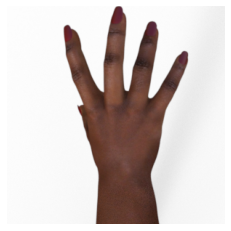

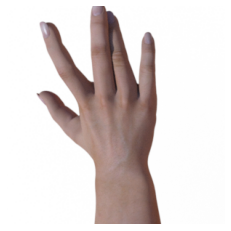

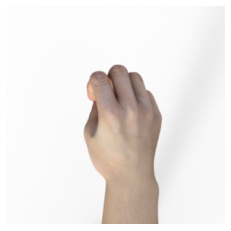

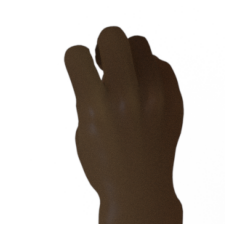

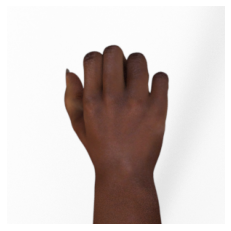

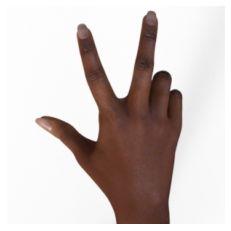

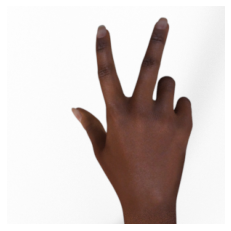

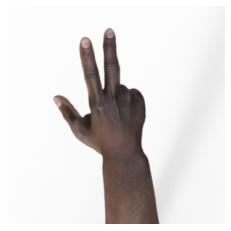

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


paper_img = [os.path.join(paper_train, fname) for fname in os.listdir(paper_train)[:3]] 
rock_img = [os.path.join(rock_train, fname) for fname in os.listdir(rock_train)[:3]] 
scissor_img = [os.path.join(scissor_train, fname) for fname in os.listdir(scissor_train)[:3]] 

for i , img in enumerate(paper_img + rock_img + scissor_img):
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.axis('off')
    plt.show()


In [48]:
paper_train

'train-data/rps/paper'

In [55]:
## genereating the image using tensorflow imagedatagenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                fill_mode='nearest',
                                horizontal_flip=True,
                                vertical_flip=True,
                                rescale=1.0/255.0                    
                               )

test_gen = ImageDataGenerator(rescale = 1.0/255.0)


In [56]:
## Fetching data from directory

training_data_dir = "train-data/rps"
train  = train_gen.flow_from_directory(training_data_dir,
                                       target_size=(150, 150),
                                       class_mode='categorical',
                                       batch_size = 64
                                       )

testing_data_dir = 'data/rps-test-set'
test = test_gen.flow_from_directory(testing_dir, 
                                    target_size=(150, 150),
                                    class_mode='categorical', 
                                    batch_size=64
                                    )

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [66]:
## Image shape
print(train.image_shape)

## Features labels
print(train.index_array)


(150, 150, 3)
[1220  302 1468 ... 1716  173 1969]


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


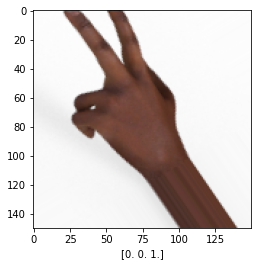

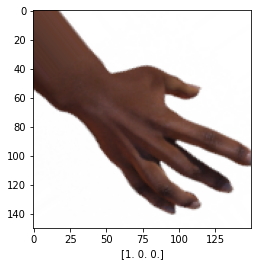

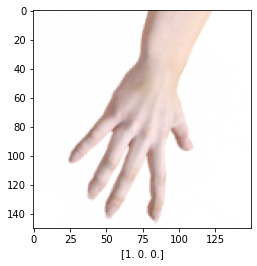

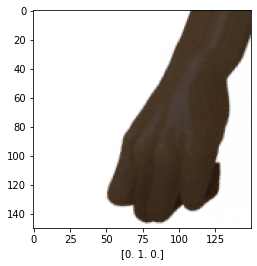

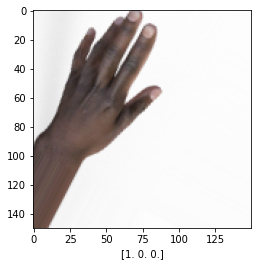

In [69]:
## Let's print some of image from training set

for _ in range(5):
    img, label = train.next()
    plt.imshow(img[0])
    plt.xlabel(label[0])
    plt.show()


In [80]:
## Creating CNN 
from tensorflow.keras import layers, models

model = models.Sequential([
                           ## One convolution batch
                           layers.Conv2D(32, (3, 3), input_shape=(train.image_shape), activation = 'relu'),
                           layers.MaxPooling2D(2, 2),

                           # Second Convolution batch
                           layers.Conv2D(64, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),

                           # Third Convolution batch
                           layers.Conv2D(64, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),

                           layers.Conv2D(64, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),

                           # Now flattening the data
                           layers.Flatten(),
                           # Also add dropout layers
                           layers.Dropout(0.2),

                           # Now adding Fully connected layers ie. Dense layers
                           layers.Dense(512, activation = 'relu'),
                           layers.Dense(3, activation = 'softmax')
])

model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 17, 17, 64)      

In [81]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [82]:
history = model.fit(train, steps_per_epoch=40, epochs=20, validation_data=test, validation_steps=6)

Epoch 1/20
40/40 [==============================] - 156s 4s/step - loss: 1.0969 - accuracy: 0.3631 - val_loss: 1.0232 - val_accuracy: 0.4382
Epoch 2/20
40/40 [==============================] - 105s 3s/step - loss: 0.9817 - accuracy: 0.4897 - val_loss: 0.8524 - val_accuracy: 0.5699
Epoch 3/20
40/40 [==============================] - 105s 3s/step - loss: 0.7983 - accuracy: 0.6163 - val_loss: 0.5391 - val_accuracy: 0.7688
Epoch 4/20
40/40 [==============================] - 103s 3s/step - loss: 0.6413 - accuracy: 0.7107 - val_loss: 0.2741 - val_accuracy: 0.9005
Epoch 5/20
40/40 [==============================] - 105s 3s/step - loss: 0.4840 - accuracy: 0.8020 - val_loss: 0.1641 - val_accuracy: 0.9677
Epoch 6/20
40/40 [==============================] - 104s 3s/step - loss: 0.4364 - accuracy: 0.8282 - val_loss: 0.2249 - val_accuracy: 0.8871
Epoch 7/20
40/40 [==============================] - 105s 3s/step - loss: 0.3089 - accuracy: 0.8790 - val_loss: 0.0966 - val_accuracy: 0.9731
Epoch 8/20
40

In [85]:
def create_plot(history):
    ## Plotting the accucary graph
    plt.plot(history.history['accuracy'], c='b')
    plt.plot(history.history['val_accuracy'], c='g')
    plt.legend(['accuracy', 'val_accuracy'])
    plt.title('accuracy graph')
    plt.show()


    ## Plotting loss graph
    plt.plot(history.history['loss'], c='b')
    plt.plot(history.history['val_loss'], c='g')
    plt.legend(['loss', 'val_loss'])
    plt.title('loss graph')
    plt.show()

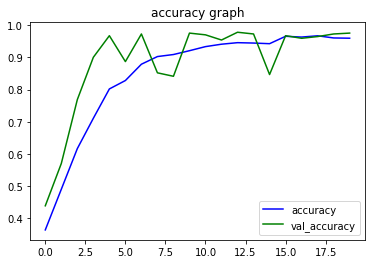

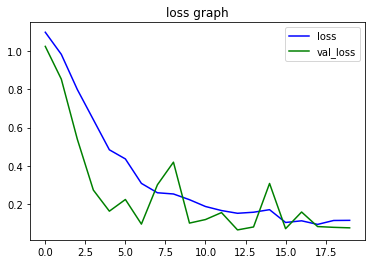

In [86]:
create_plot(history)

In [ ]:

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)